In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
titanic_df =  pd.read_csv("./titanic3.csv")

In [19]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [21]:
titanic_df.shape

(1309, 14)

In [22]:
titanic_df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [23]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [24]:
titanic_df = titanic_df.drop(['name','ticket','cabin'],axis=1)

In [25]:
titanic_df['age'].fillna(titanic_df['age'].median(),inplace=True)

In [26]:
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female' : 1})

In [27]:
sns.countplot(x='Pclass', data=titanic_df)

ValueError: Could not interpret input 'Pclass'

(array([ 51.,  21.,  22.,  40., 114., 160., 391., 122.,  97.,  64.,  51.,
         57.,  38.,  27.,  21.,  20.,   5.,   5.,   2.,   1.]),
 array([ 0.1667  ,  4.158365,  8.15003 , 12.141695, 16.13336 , 20.125025,
        24.11669 , 28.108355, 32.10002 , 36.091685, 40.08335 , 44.075015,
        48.06668 , 52.058345, 56.05001 , 60.041675, 64.03334 , 68.025005,
        72.01667 , 76.008335, 80.      ]),
 <BarContainer object of 20 artists>)

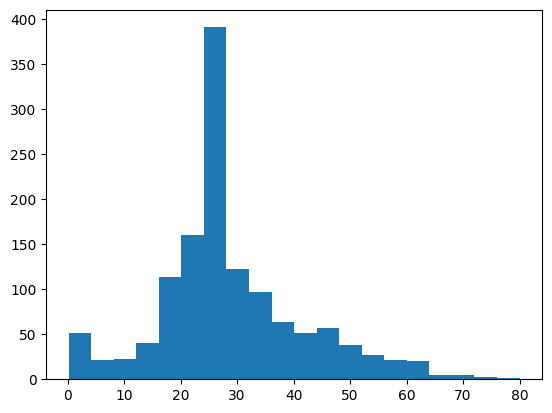

In [28]:
plt.hist(titanic_df['age'],bins=20)

([<matplotlib.patches.Wedge at 0x7f19bb2ce4f0>,
 [Text(-1.025241840765357, -0.3985964976565432, 'Did not survive'),
  Text(1.0252418034460549, 0.39859659364661043, 'Survived')],
 [Text(-0.5592228222356492, -0.21741627144902353, '61.8%'),
  Text(0.5592228018796662, 0.21741632380724202, '38.2%')])

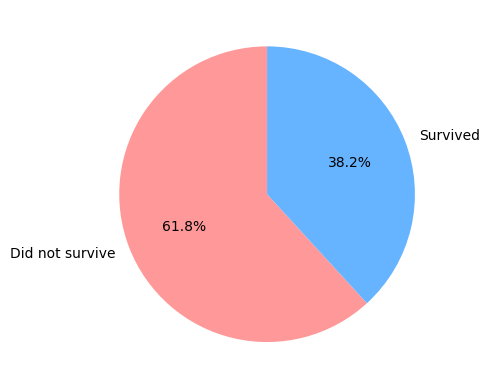

In [29]:
labels = ['Did not survive', 'Survived']
sizes = [titanic_df['survived'].value_counts()[0], titanic_df['survived'].value_counts()[1]]
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

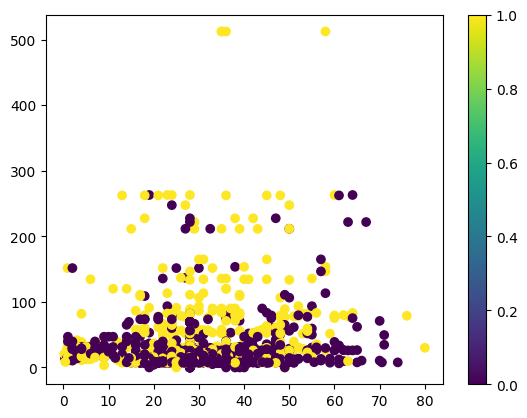

In [30]:
plt.scatter(titanic_df['age'], titanic_df['fare'], c=titanic_df['survived'])
plt.colorbar()